In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
###PART 1###

#constants and initial positions
ms = 1e7 #mass of the sun
mp = 1e4 #mass of jupiter
ma = 1 #mass of asteroid

G  = 1

R = 20 #|rs - rp|

###1a###
xs = 0 #sun is at x=0
###1b###
xp = R #jupiter is 20 units away

rs = np.array([xs,0])
rp = np.array([xp,0])
#print(rs,rp)

rcm = (rp*mp + rs*ms)/(mp + ms)
#print(rcm)

###1c###
rs = rs - rcm
rp = rp - rcm
#print(rs)

theta = np.radians(45)
xa = R * np.cos(theta)
ya = R * np.sin(theta)

ra = np.array([xa,ya])
#print(xa,ya)

In [3]:
###PART 2###
mu = ms * mp / (ms + mp)
omega = np.sqrt((G*ms*mp)/(mu * R**3))

In [4]:
vs = omega * rs[::-1]
vp = omega * rp[::-1]
va = np.array([-omega * ra[0], omega*ra[1]])
print(vs)
print(vp)
print(va)

[ 0.         -0.70675349]
[  0.         706.75349274]
[-500.24993753  500.24993753]


In [5]:
ys = np.concatenate([rs,vs])
yp = np.concatenate([rp,vp])
ya = np.concatenate([ra,va])

y0 = np.concatenate((ys,yp,ya))
print(y0)

[-1.99800200e-02  0.00000000e+00  0.00000000e+00 -7.06753493e-01
  1.99800200e+01  0.00000000e+00  0.00000000e+00  7.06753493e+02
  1.41421356e+01  1.41421356e+01 -5.00249938e+02  5.00249938e+02]


In [6]:
###PART 3###
def KeplerODE(t,y):
    global mp,ms,G #global?

    rs = y[0:2] #print(rs) = [x,y]
    vs = y[2:4]
    rp = y[4:6]  
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]
    
    r_sp = np.sqrt((rs[0]-rp[0])**2 + (rs[1]-rp[1])**2) # (xs-xp)**2 + (ys-yp)**2
    r_sa = np.sqrt((rs[0]-ra[0])**2 + (rs[1]-ra[1])**2)
    r_pa = np.sqrt((rp[0]-ra[0])**2 + (rp[1]-ra[1])**2)
    
    # SUN
    drdt_S = vs
    
    F_sp = (-G * ms * mp) / (r_sp**3) * (rs-rp)
    F_sa = (-G * ms * ma) / (r_sa**3) * (rs-ra)
    a_s    = (F_sp + F_sa) / ms
    
    dvdt_S = a_s
    
    dydt_S = np.concatenate((drdt_S,dvdt_S))
    
    # PLANET
    drdt_P = vp

    F_ps = (-G * ms * mp) / (r_sp**3) * (rp-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (rp-ra)
    a_p    = (F_ps + F_pa) / mp
    
    dvdt_P = a_p
    
    dydt_P = np.concatenate((drdt_P,dvdt_P))
    
    # ASTEROID
    drdt_A = va

    F_sa = (-G * ms * ma) / (r_sa**3) * (ra-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (ra-rp)
    a_a    = (F_sa + F_pa) / ma
    
    dvdt_A = a_a
    
    dydt_A = np.concatenate((drdt_A,dvdt_A))
    
    dydt = np.concatenate((dydt_S,dydt_P,dydt_A))

    return dydt

In [7]:
###PART 4###
y = np.copy(y0)
t = 0
n = 1000
P = np.sqrt((4*np.pi**2) * R**3 / (G*(ms+mp)))
dt = P / n

# initialize array and give the array initial positions
sun_xt = np.array(y[0])
sun_yt = np.array(y[1])
planet_xt = np.array(y[4])
planet_yt = np.array(y[5])
asteroid_xt = np.array(y[8])
asteroid_yt = np.array(y[9])

for step in range(0,int(n/4)):
    F1 = KeplerODE(step,y)
    
    y2 = y +(dt/2)*F1
    F2 = KeplerODE(step,y2)
    
    y3 = y +(dt/2)*F2
    F3 = KeplerODE(step,y3)
    
    y4 = y +(dt)*F3
    F4 = KeplerODE(step,y4)
    
    y = y + (dt/6) * (F1 + 2*F2 + 2*F3 + F4)
    
    sun_xt = np.append(sun_xt,y[0])
    sun_yt = np.append(sun_yt,y[1])
    planet_xt = np.append(planet_xt,y[4])
    planet_yt = np.append(planet_yt,y[5])
    asteroid_xt = np.append(asteroid_xt,y[8])
    asteroid_yt = np.append(asteroid_yt,y[9])

Text(0.5, 1.0, '3 body system')

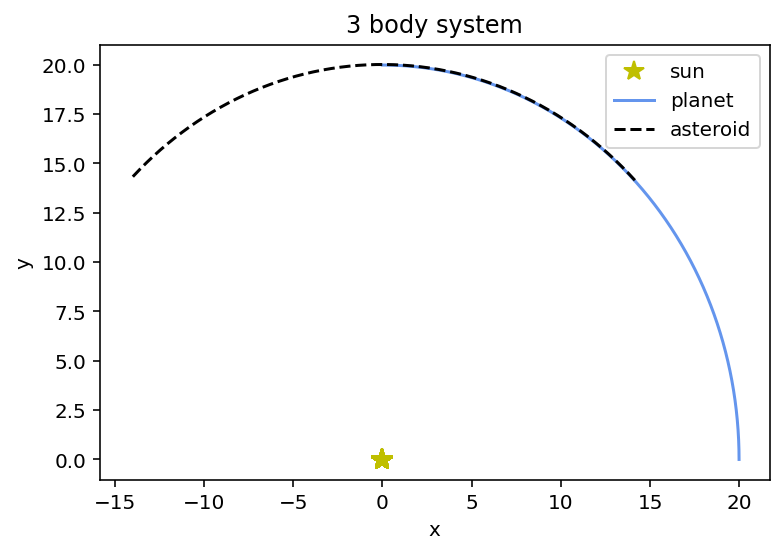

In [8]:
plt.plot(sun_xt,sun_yt,'y*',ms=10,label='sun')
plt.plot(planet_xt,planet_yt,color='cornflowerblue',label='planet')
plt.plot(asteroid_xt,asteroid_yt,'k--',label='asteroid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('3 body system')

In [9]:
###PART 5###
y = np.copy(y0)
t = 0
n = 1000
P = np.sqrt((4*np.pi**2) * R**3 / (G*(ms+mp)))
dt = P / n

asteroid_xcoords, asteroid_ycoords = np.array((y[8],y[9]))
transform = np.zeros((2,2))

for step in range(0,int(20*n)):
    
    xp,yp = (y[4],y[5])
    ra = (y[8],y[9])
    
    theta = np.arctan2(yp,xp)
    
    transform[0,:] = [np.cos(theta),np.sin(theta)]
    transform[1,:] = [-np.sin(theta),np.cos(theta)]
    
    ra_prime = transform @ ra
    
    asteroid_xcoords = np.append(asteroid_xcoords,ra_prime[0])
    asteroid_ycoords = np.append(asteroid_ycoords,ra_prime[1])
    
    F1 = KeplerODE(step,y)
    
    y2 = y +(dt/2)*F1
    F2 = KeplerODE(step,y2)
    
    y3 = y +(dt/2)*F2
    F3 = KeplerODE(step,y3)
    
    y4 = y +(dt)*F3
    F4 = KeplerODE(step,y4)
    
    y = y + (dt/6) * (F1 + 2*F2 + 2*F3 + F4)

Text(0.5, 1.0, '3 body system')

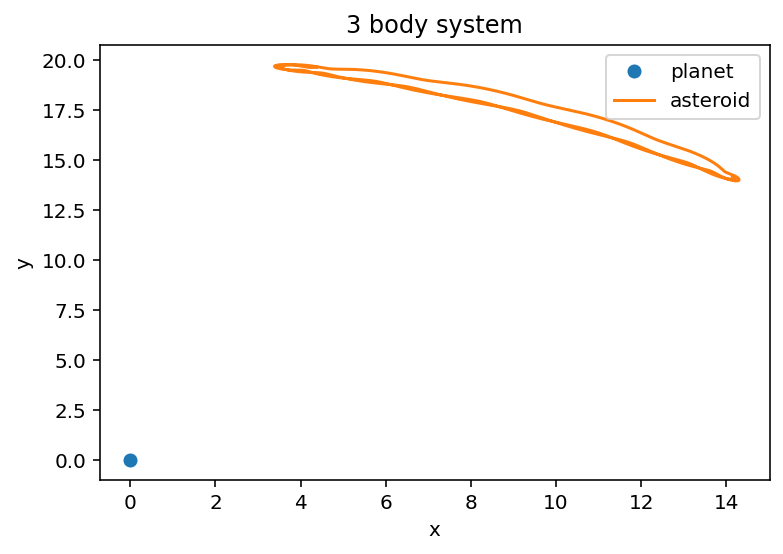

In [10]:
plt.plot(0,0,'o',label='planet')
plt.plot(asteroid_xcoords,asteroid_ycoords,label='asteroid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('3 body system')

PART 7 | PART 7 | PART 7 | PART 7 | PART 7 | PART 7 | PART 7 | PART 7 | PART 7 | PART 7 | PART 7 | PART 7 | PART 7 

[        0.         -79587283.75312227]
[0. 0.]
[-56276708.0380507  56276708.0380507]
[-2.00000000e+01  0.00000000e+00  0.00000000e+00 -7.95872838e+07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.41421356e+01  1.41421356e+01 -5.62767080e+07  5.62767080e+07]


Text(0.5, 1.0, '3 body system')

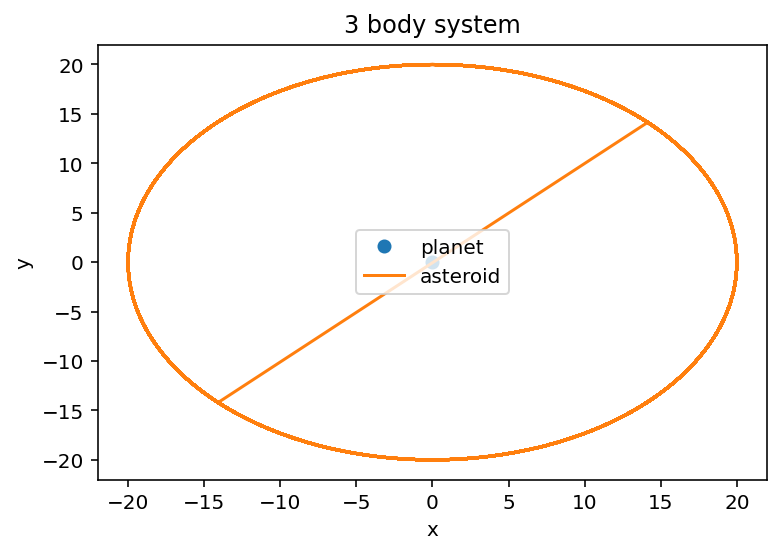

In [11]:
###PART 7###
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

###PART 1###

#constants and initial positions
ms = 1e7 #mass of the sun
mp = 1.89813e27 #mass of jupiter ---------------------
ma = 1 #mass of asteroid

G  = 6.67408e-11 #gravitational constant ----------------------
R = 20 #|rs - rp|

###1a###
xs = 0 #sun is at x=0
###1b###
xp = R #jupiter is 20 units away

rs = np.array([xs,0])
rp = np.array([xp,0])
#print(rs,rp)

rcm = (rp*mp + rs*ms)/(mp + ms)
#print(rcm)

###1c###
rs = rs - rcm
rp = rp - rcm
#print(rs)

theta = np.radians(45)
xa = R * np.cos(theta)
ya = R * np.sin(theta)

ra = np.array([xa,ya])
#print(xa,ya)

###PART 2###
mu = ms * mp / (ms + mp)
omega = np.sqrt((G*ms*mp)/(mu * R**3))

vs = omega * rs[::-1]
vp = omega * rp[::-1]
va = (np.array([-omega * ra[0], omega*ra[1]]))*1.0 #multiplier, here it is 0% increase ------------------------------
print(vs)
print(vp)
print(va)

ys = np.concatenate([rs,vs])
yp = np.concatenate([rp,vp])
ya = np.concatenate([ra,va])

y0 = np.concatenate((ys,yp,ya))
print(y0)

###PART 3###
def KeplerODE(t,y):
    global mp,ms,G #global?

    rs = y[0:2] #print(rs) = [x,y]
    vs = y[2:4]
    rp = y[4:6]  
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]
    
    r_sp = np.sqrt((rs[0]-rp[0])**2 + (rs[1]-rp[1])**2) # (xs-xp)**2 + (ys-yp)**2
    r_sa = np.sqrt((rs[0]-ra[0])**2 + (rs[1]-ra[1])**2)
    r_pa = np.sqrt((rp[0]-ra[0])**2 + (rp[1]-ra[1])**2)
    
    # SUN
    drdt_S = vs
    
    F_sp = (-G * ms * mp) / (r_sp**3) * (rs-rp)
    F_sa = (-G * ms * ma) / (r_sa**3) * (rs-ra)
    a_s    = (F_sp + F_sa) / ms
    
    dvdt_S = a_s
    
    dydt_S = np.concatenate((drdt_S,dvdt_S))
    
    # PLANET
    drdt_P = vp

    F_ps = (-G * ms * mp) / (r_sp**3) * (rp-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (rp-ra)
    a_p    = (F_ps + F_pa) / mp
    
    dvdt_P = a_p
    
    dydt_P = np.concatenate((drdt_P,dvdt_P))
    
    # ASTEROID
    drdt_A = va

    F_sa = (-G * ms * ma) / (r_sa**3) * (ra-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (ra-rp)
    a_a    = (F_sa + F_pa) / ma
    
    dvdt_A = a_a
    
    dydt_A = np.concatenate((drdt_A,dvdt_A))
    
    dydt = np.concatenate((dydt_S,dydt_P,dydt_A))

    return dydt

###PART 5###
y = np.copy(y0)
t = 100
n = 1000
P = np.sqrt((4*np.pi**2) * R**3 / (G*(ms+mp)))
dt = P / n

asteroid_xcoords, asteroid_ycoords = np.array((y[8],y[9]))
transform = np.zeros((2,2))

for step in range(0,int(100*n)):
    
    xp,yp = (y[4],y[5])
    ra = (y[8],y[9])
    
    theta = np.arctan2(yp,xp)
    
    transform[0,:] = [np.cos(theta),np.sin(theta)]
    transform[1,:] = [-np.sin(theta),np.cos(theta)]
    
    ra_prime = transform @ ra
    
    asteroid_xcoords = np.append(asteroid_xcoords,ra_prime[0])
    asteroid_ycoords = np.append(asteroid_ycoords,ra_prime[1])
    
    F1 = KeplerODE(step,y)
    
    y2 = y +(dt/2)*F1
    F2 = KeplerODE(step,y2)
    
    y3 = y +(dt/2)*F2
    F3 = KeplerODE(step,y3)
    
    y4 = y +(dt)*F3
    F4 = KeplerODE(step,y4)
    
    y = y + (dt/6) * (F1 + 2*F2 + 2*F3 + F4)
    
plt.plot(0,0,'o',label='planet')
plt.plot(asteroid_xcoords,asteroid_ycoords,label='asteroid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('3 body system')
#####  Jupiter ejects the asteroid from the system without needing to increase initial speed
##### See dashed areas in this cell

PART 8 | PART 8 | PART 8 | PART 8 | PART 8 | PART 8 | PART 8 | PART 8 | PART 8 | PART 8 | PART 8 | PART 8 | PART 8 

[ 0.         -0.70675349]
[  0.         706.75349274]
[7.10997547e+02 8.70720871e-14]
[-1.99800200e-02  0.00000000e+00  0.00000000e+00 -7.06753493e-01
  1.99800200e+01  0.00000000e+00  0.00000000e+00  7.06753493e+02
 -2.00000000e+01  2.44929360e-15  7.10997547e+02  8.70720871e-14]


Text(0.5, 1.0, '3 body system')

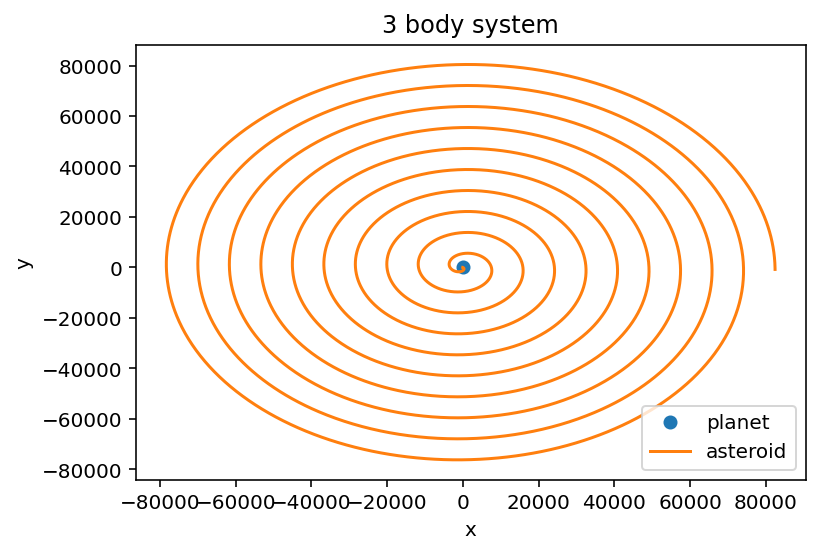

In [12]:
### PART 8 ###

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

###PART 1###

#constants and initial positions
ms = 1e7 #mass of the sun
mp = 1e4 #mass of jupiter
ma = 1 #mass of asteroid

G  = 1

R = 20 #|rs - rp|

###1a###
xs = 0 #sun is at x=0
###1b###
xp = R #jupiter is 20 units away

rs = np.array([xs,0])
rp = np.array([xp,0])
#print(rs,rp)

rcm = (rp*mp + rs*ms)/(mp + ms)
#print(rcm)

###1c###
rs = rs - rcm
rp = rp - rcm
#print(rs)

theta = np.radians(180)
xa = R * np.cos(theta)
ya = R * np.sin(theta)

ra = np.array([xa,ya])
#print(xa,ya)

###PART 2###
mu = ms * mp / (ms + mp)
omega = np.sqrt((G*ms*mp)/(mu * R**3))

vs = omega * rs[::-1]
vp = omega * rp[::-1]
va = np.array([-omega * ra[0], omega*ra[1]])*1.005
print(vs)
print(vp)
print(va)

ys = np.concatenate([rs,vs])
yp = np.concatenate([rp,vp])
ya = np.concatenate([ra,va])

y0 = np.concatenate((ys,yp,ya))
print(y0)

###PART 3###
def KeplerODE(t,y):
    global mp,ms,G #global?

    rs = y[0:2] #print(rs) = [x,y]
    vs = y[2:4]
    rp = y[4:6]  
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]
    
    r_sp = np.sqrt((rs[0]-rp[0])**2 + (rs[1]-rp[1])**2) # (xs-xp)**2 + (ys-yp)**2
    r_sa = np.sqrt((rs[0]-ra[0])**2 + (rs[1]-ra[1])**2)
    r_pa = np.sqrt((rp[0]-ra[0])**2 + (rp[1]-ra[1])**2)
    
    # SUN
    drdt_S = vs
    
    F_sp = (-G * ms * mp) / (r_sp**3) * (rs-rp)
    F_sa = (-G * ms * ma) / (r_sa**3) * (rs-ra)
    a_s    = (F_sp + F_sa) / ms
    
    dvdt_S = a_s
    
    dydt_S = np.concatenate((drdt_S,dvdt_S))
    
    # PLANET
    drdt_P = vp

    F_ps = (-G * ms * mp) / (r_sp**3) * (rp-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (rp-ra)
    a_p    = (F_ps + F_pa) / mp
    
    dvdt_P = a_p
    
    dydt_P = np.concatenate((drdt_P,dvdt_P))
    
    # ASTEROID
    drdt_A = va

    F_sa = (-G * ms * ma) / (r_sa**3) * (ra-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (ra-rp)
    a_a    = (F_sa + F_pa) / ma
    
    dvdt_A = a_a
    
    dydt_A = np.concatenate((drdt_A,dvdt_A))
    
    dydt = np.concatenate((dydt_S,dydt_P,dydt_A))

    return dydt

###PART 5###
y = np.copy(y0)
t = 100
n = 1000
P = np.sqrt((4*np.pi**2) * R**3 / (G*(ms+mp)))
dt = P / n

asteroid_xcoords, asteroid_ycoords = np.array((y[8],y[9]))
transform = np.zeros((2,2))

for step in range(0,int(10*n)):
    
    xp,yp = (y[4],y[5])
    ra = (y[8],y[9])
    
    theta = np.arctan2(yp,xp)
    
    transform[0,:] = [np.cos(theta),np.sin(theta)]
    transform[1,:] = [-np.sin(theta),np.cos(theta)]
    
    ra_prime = transform @ ra
    
    asteroid_xcoords = np.append(asteroid_xcoords,ra_prime[0])
    asteroid_ycoords = np.append(asteroid_ycoords,ra_prime[1])
    
    F1 = KeplerODE(step,y)
    
    y2 = y +(dt/2)*F1
    F2 = KeplerODE(step,y2)
    
    y3 = y +(dt/2)*F2
    F3 = KeplerODE(step,y3)
    
    y4 = y +(dt)*F3
    F4 = KeplerODE(step,y4)
    
    y = y + (dt/6) * (F1 + 2*F2 + 2*F3 + F4)
    
plt.plot(0,0,'o',label='planet')
plt.plot(asteroid_xcoords,asteroid_ycoords,label='asteroid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('3 body system')


###0.5% increase shown in PLOT 1

[ 0.         -0.70675349]
[  0.         706.75349274]
[1.02935466e+03 1.26059589e-13]
[-1.99800200e-02  0.00000000e+00  0.00000000e+00 -7.06753493e-01
  1.99800200e+01  0.00000000e+00  0.00000000e+00  7.06753493e+02
 -2.00000000e+01  2.44929360e-15  1.02935466e+03  1.26059589e-13]


Text(0.5, 1.0, '3 body system')

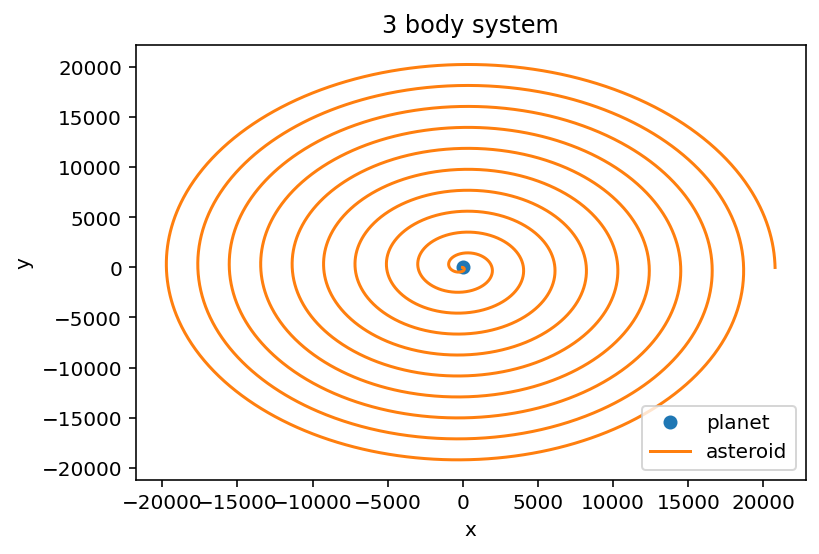

In [13]:
### PART 8 ### (2nd graph)

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

###PART 1###

#constants and initial positions
ms = 1e7 #mass of the sun
mp = 1e4 #mass of jupiter
ma = 1 #mass of asteroid

G  = 1

R = 20 #|rs - rp|

###1a###
xs = 0 #sun is at x=0
###1b###
xp = R #jupiter is 20 units away

rs = np.array([xs,0])
rp = np.array([xp,0])
#print(rs,rp)

rcm = (rp*mp + rs*ms)/(mp + ms)
#print(rcm)

###1c###
rs = rs - rcm
rp = rp - rcm
#print(rs)

theta = np.radians(180)
xa = R * np.cos(theta)
ya = R * np.sin(theta)

ra = np.array([xa,ya])
#print(xa,ya)

###PART 2###
mu = ms * mp / (ms + mp)
omega = np.sqrt((G*ms*mp)/(mu * R**3))

vs = omega * rs[::-1]
vp = omega * rp[::-1]
va = np.array([-omega * ra[0], omega*ra[1]])*1.455
print(vs)
print(vp)
print(va)

ys = np.concatenate([rs,vs])
yp = np.concatenate([rp,vp])
ya = np.concatenate([ra,va])

y0 = np.concatenate((ys,yp,ya))
print(y0)

###PART 3###
def KeplerODE(t,y):
    global mp,ms,G #global?

    rs = y[0:2] #print(rs) = [x,y]
    vs = y[2:4]
    rp = y[4:6]  
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]
    
    r_sp = np.sqrt((rs[0]-rp[0])**2 + (rs[1]-rp[1])**2) # (xs-xp)**2 + (ys-yp)**2
    r_sa = np.sqrt((rs[0]-ra[0])**2 + (rs[1]-ra[1])**2)
    r_pa = np.sqrt((rp[0]-ra[0])**2 + (rp[1]-ra[1])**2)
    
    # SUN
    drdt_S = vs
    
    F_sp = (-G * ms * mp) / (r_sp**3) * (rs-rp)
    F_sa = (-G * ms * ma) / (r_sa**3) * (rs-ra)
    a_s    = (F_sp + F_sa) / ms
    
    dvdt_S = a_s
    
    dydt_S = np.concatenate((drdt_S,dvdt_S))
    
    # PLANET
    drdt_P = vp

    F_ps = (-G * ms * mp) / (r_sp**3) * (rp-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (rp-ra)
    a_p    = (F_ps + F_pa) / mp
    
    dvdt_P = a_p
    
    dydt_P = np.concatenate((drdt_P,dvdt_P))
    
    # ASTEROID
    drdt_A = va

    F_sa = (-G * ms * ma) / (r_sa**3) * (ra-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (ra-rp)
    a_a    = (F_sa + F_pa) / ma
    
    dvdt_A = a_a
    
    dydt_A = np.concatenate((drdt_A,dvdt_A))
    
    dydt = np.concatenate((dydt_S,dydt_P,dydt_A))

    return dydt

###PART 5###
y = np.copy(y0)
t = 100
n = 1000
P = np.sqrt((4*np.pi**2) * R**3 / (G*(ms+mp)))
dt = P / n

asteroid_xcoords, asteroid_ycoords = np.array((y[8],y[9]))
transform = np.zeros((2,2))

for step in range(0,int(10*n)):
    
    xp,yp = (y[4],y[5])
    ra = (y[8],y[9])
    
    theta = np.arctan2(yp,xp)
    
    transform[0,:] = [np.cos(theta),np.sin(theta)]
    transform[1,:] = [-np.sin(theta),np.cos(theta)]
    
    ra_prime = transform @ ra
    
    asteroid_xcoords = np.append(asteroid_xcoords,ra_prime[0])
    asteroid_ycoords = np.append(asteroid_ycoords,ra_prime[1])
    
    F1 = KeplerODE(step,y)
    
    y2 = y +(dt/2)*F1
    F2 = KeplerODE(step,y2)
    
    y3 = y +(dt/2)*F2
    F3 = KeplerODE(step,y3)
    
    y4 = y +(dt)*F3
    F4 = KeplerODE(step,y4)
    
    y = y + (dt/6) * (F1 + 2*F2 + 2*F3 + F4)
    
plt.plot(0,0,'o',label='planet')
plt.plot(asteroid_xcoords,asteroid_ycoords,label='asteroid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('3 body system')

### A 45.5% increase in speed reduces the range of the X and Y coordinates of the asteroid by constraining it to a tighter system in PLOT 2